Importing Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
house_sales = pd.read_csv('../data/kaggle/House Price.csv')


The dataset has total 18 features


In [4]:
house_sales.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-14 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-14 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-14 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-14 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-14 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
len(house_sales)


4598

Simple Linear Regression i.e only one feature is used for predicting price.
Here, we will be using Square Feet to predict the price.

In [6]:
x = house_sales[['sqft_living']]
y = house_sales[['price']]

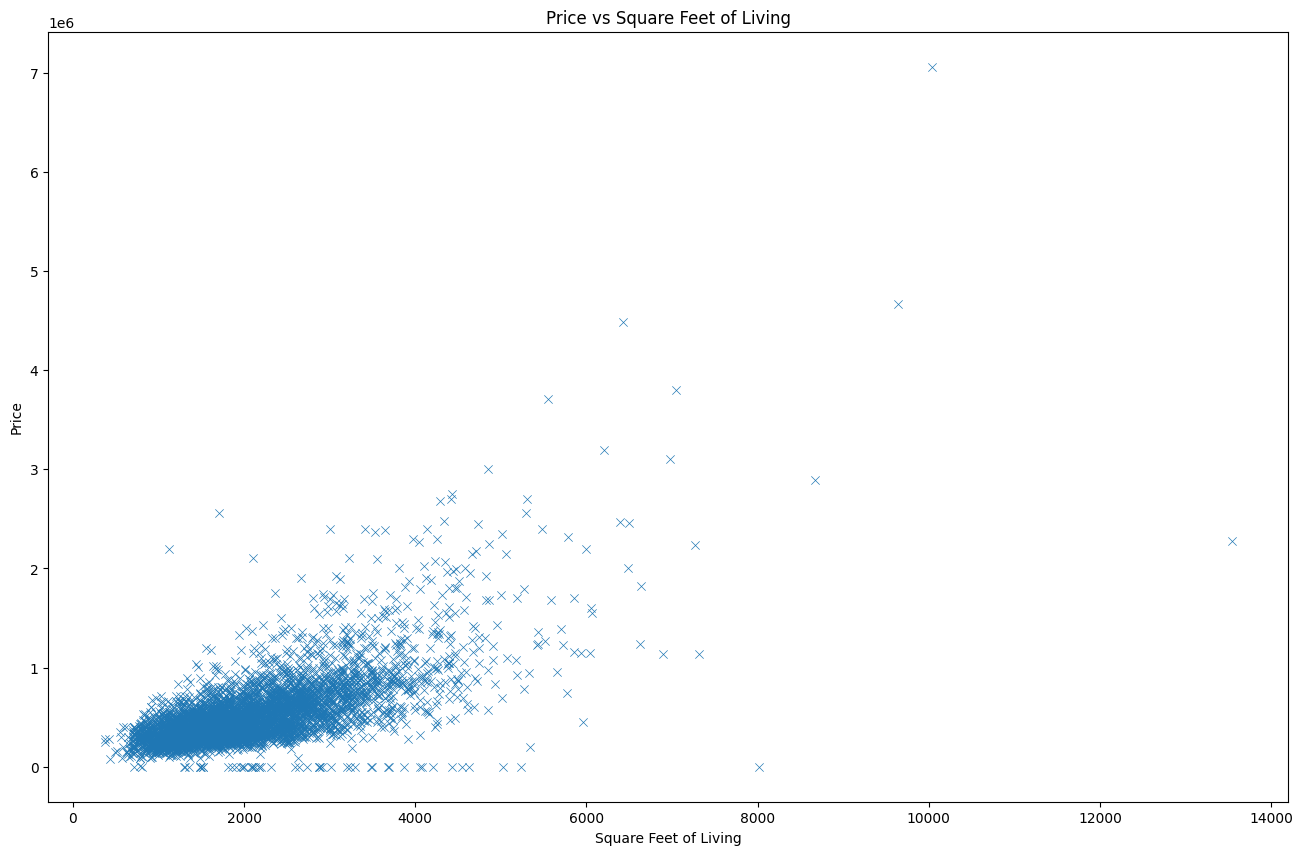

In [7]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=x['sqft_living'], y= y['price'], marker='x')
plt.title("Price vs Square Feet of Living")
plt.xlabel("Square Feet of Living")
plt.ylabel("Price")
plt.show()

Training our model begins from here.
Splitting the data set in 2 parts viz.Train set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Number of samples in Training set: ", len(X_train), "(80%)\nNumber of samples in Testing set: ", len(X_test), "(20%)")

Number of samples in Training set:  3678 (80%)
Number of samples in Testing set:  920 (20%)


In [9]:
from sklearn.linear_model import LinearRegression
sq_model = LinearRegression()

sq_model.fit(X_train,y_train)

LinearRegression()

Let's predict

In [11]:
y_pred = pd.DataFrame(sq_model.predict(X_test), columns= ['Predictions'])

from sklearn import metrics
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred), 2))


Mean Absolute Error: 179174.6


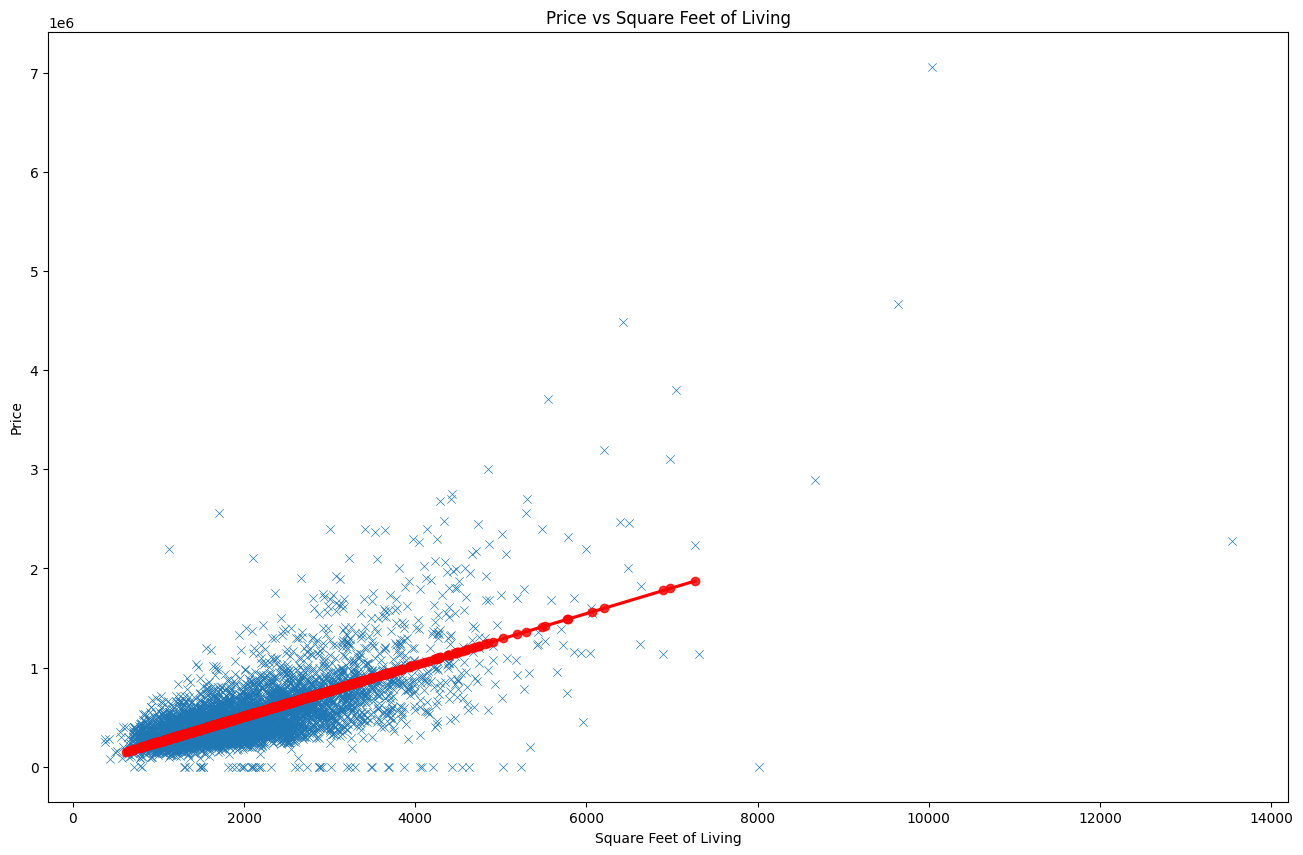

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=x['sqft_living'], y=y['price'], marker='x')
sns.regplot(x=X_test['sqft_living'], y=y_pred['Predictions'], color='red')
plt.title("Price vs Square Feet of Living")
plt.xlabel("Square Feet of Living")
plt.ylabel("Price")
plt.show()


In [14]:
area = int(input("Enter Area in sqft: "))
pred_val = sq_model.predict([[area]])                                                             #Important: Used to take input so that it can predict.
print("\nPredicted Price:", pred_val[0][0].round(decimals = 2))

#The following lines of codes basically finds the house with same area or area close to the given value and takes mean of all houses with that area
#so that we can compare how correctly we predicted the price.

result_index = house_sales['sqft_living'].sub(area).abs().idxmin()
nearest_house = house_sales.iloc[result_index]['sqft_living']
house = house_sales[house_sales['sqft_living']==nearest_house]
mean_price = house["price"].mean()
print("Mean Price for houses with", house_sales.iloc[result_index]['sqft_living'], "sqft area:", mean_price)



Predicted Price: 69782.5
Mean Price for houses with 370 sqft area: 276000.0


c:\Users\Shubham Maurya\AppData\Roaming\pypoetry\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
